EEG Quality Index (Best N elements)

Script Features:
1. imports first scans for every participant
2. Merge mild and moderate dementia classes
3. Run SQF on the none,severe and mild-moderate dementia classes
4. No best picks, remove scans scored zero


In [1]:
from fn_cfg import *
import params as cfg
from SQF import signal_quality_index

In [2]:
"Laurel Place Dataset"
localPath = '/Users/joshuaighalo/Downloads/brainNet_datasets/laurel_place/cleaned_dataset'
scansInfo_Path = "/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/"
image_dest_dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/grp_avgs_2.2'
filename = 'first_scan_per_all_participants.csv'
file_dir = scansInfo_Path+filename
version = 1.0
disp = "Cz"
cutoff_LP = [True,cfg.lowPass]

In [3]:
def eeg_quality(filenames,version,localPath):
    def param_fnc(filename,version,localPath):
        device = importFile.neurocatch()
        fileObjects = device.init(version,filename,localPath,dispIMG=False)
        rawEEG = fileObjects[0]
        rawEOG = fileObjects[1]
        rawEEGEOG = fileObjects[2]
        time = fileObjects[3]
        quality = signal_quality_index(rawEEG[:,0],time,filename,dispIMG=True)
        return quality
    output = []
    for i in range(len(filenames)):
        output.append(param_fnc(filenames[i],version,localPath))
    output = np.array(output)
    return output

def nonZero(files,scores):
    idx_zero = np.where(scores == 0)[0]
    nonZeroScores = np.delete(scores,idx_zero)
    qFiles = np.delete(files,idx_zero)
    return qFiles,nonZeroScores

def topScores(files,scores,size):
    idx_sort = np.argsort(scores)
    idx_sort = idx_sort[::-1]
    topScores = np.take(scores,idx_sort[:size])
    topFiles = np.take(files,idx_sort[:size])
    return topFiles,topScores

In [4]:
#   baseline scans for different dementia classes
first_scans = pd.read_csv(file_dir)

In [5]:
#   scans at the baseline point for different dementia classes
nd_baseline = np.asarray([x for x in (first_scans['Baseline No Dementia'].to_numpy()) if str(x) != 'nan'])
mild_baseline = np.asarray([x for x in (first_scans['Baseline Mild Dementia'].to_numpy()) if str(x) != 'nan'])
moderate_baseline = np.asarray([x for x in (first_scans['Baseline Moderate Dementia'].to_numpy()) if str(x) != 'nan'])
mild_moderate_baseline = np.hstack((mild_baseline,moderate_baseline))
severe_baseline = np.asarray([x for x in (first_scans['Baseline Severe Dementia'].to_numpy()) if str(x) != 'nan'])

#   scans at the 6-month point for different dementia classes
nd_6 = np.asarray([x for x in (first_scans['4-months No Dementia'].to_numpy()) if str(x) != 'nan'])
mild_6 = np.asarray([x for x in (first_scans['4-months Mild Dementia'].to_numpy()) if str(x) != 'nan'])
moderate_6 = np.asarray([x for x in (first_scans['4-months Moderate Dementia'].to_numpy()) if str(x) != 'nan'])
mild_moderate_6 = np.hstack((mild_6,moderate_6))
severe_6 = np.asarray([x for x in (first_scans['4-months Severe Dementia'].to_numpy()) if str(x) != 'nan'])

# scans at the 12-month point for different dementia classes
nd_12 = np.asarray([x for x in (first_scans['8-months No Dementia'].to_numpy()) if str(x) != 'nan'])
mild_12 = np.asarray([x for x in (first_scans['8-months Mild Dementia'].to_numpy()) if str(x) != 'nan'])
moderate_12 = np.asarray([x for x in (first_scans['8-months Moderate Dementia'].to_numpy()) if str(x) != 'nan'])
mild_moderate_12 = np.hstack((mild_12,moderate_12))
severe_12 = np.asarray([x for x in (first_scans['8-months Severe Dementia'].to_numpy()) if str(x) != 'nan'])

In [6]:
#   eeg quality for different dementia classes at baseline
nd_baseline_quality = eeg_quality(nd_baseline,version,localPath)
mild_moderate_baseline_quality = eeg_quality(mild_moderate_baseline,version,localPath)
severe_baseline_quality = eeg_quality(severe_baseline,version,localPath)

0005_1_06052019_1023
Amplitude Spectrum: 76%
Line Noise: 68%
RMS: 99%
Maximum Gradient: 59%
ZCR: 96%
Kurtosis: 52%
Signal Quality: 16%


0011_1_11122017_1357
Amplitude Spectrum: 76%
Line Noise: 40%
RMS: 87%
Maximum Gradient: 78%
ZCR: 80%
Kurtosis: 65%
Signal Quality: 9%


0038_1_21032019_1045
Amplitude Spectrum: 55%
Line Noise: 20%
RMS: 90%
Maximum Gradient: 35%
ZCR: 95%
Kurtosis: 60%
Signal Quality: 1%


0049_1_25022019_1154
Amplitude Spectrum: 82%
Line Noise: 29%
RMS: 87%
Maximum Gradient: 47%
ZCR: 87%
Kurtosis: 54%
Signal Quality: 2%


0066_1_26042019_0944
Amplitude Spectrum: 84%
Line Noise: 27%
RMS: 69%
Maximum Gradient: 92%
ZCR: 73%
Kurtosis: 62%
Signal Quality: 5%


0073_1_13032019_1057
Amplitude Spectrum: 86%
Line Noise: 18%
RMS: 80%
Maximum Gradient: 71%
ZCR: 89%
Kurtosis: 66%
Signal Quality: 4%


0074_1_09062017_1048
Amplitude Spectrum: 38%
Line Noise: 37%
RMS: 84%
Maximum Gradient: 99%
ZCR: 82%
Kurtosis: 40%
Signal Quality: 4%


0075_1_22022019_1136
Amplitude Spectrum: 67%
Li

In [7]:
#   eeg quality for different dementia classes at 6-months
nd_6_quality = eeg_quality(nd_6,version,localPath)
mild_moderate_6_quality = eeg_quality(mild_moderate_6,version,localPath)
severe_6_quality = eeg_quality(severe_6,version,localPath)

0005_1_03092019_1155
Amplitude Spectrum: 88%
Line Noise: 52%
RMS: 86%
Maximum Gradient: 88%
ZCR: 86%
Kurtosis: 60%
Signal Quality: 15%


0038_1_07082019_1432
Amplitude Spectrum: 69%
Line Noise: 46%
RMS: 94%
Maximum Gradient: 62%
ZCR: 93%
Kurtosis: 62%
Signal Quality: 12%


0049_1_16072019_1044
Amplitude Spectrum: 89%
Line Noise: 26%
RMS: 86%
Maximum Gradient: 44%
ZCR: 89%
Kurtosis: 59%
Signal Quality: 2%


0066_1_27082019_1141
Amplitude Spectrum: 73%
Line Noise: 32%
RMS: 85%
Maximum Gradient: 77%
ZCR: 90%
Kurtosis: 55%
Signal Quality: 5%


0073_1_31072019_1129
Amplitude Spectrum: 84%
Line Noise: 36%
RMS: 90%
Maximum Gradient: 73%
ZCR: 86%
Kurtosis: 55%
Signal Quality: 6%


0102_1_20082019_1607
Amplitude Spectrum: 40%
Line Noise: 67%
RMS: 93%
Maximum Gradient: 41%
ZCR: 91%
Kurtosis: 45%
Signal Quality: 4%


0108_1_13082019_1105
Amplitude Spectrum: 84%
Line Noise: 40%
RMS: 84%
Maximum Gradient: 88%
ZCR: 86%
Kurtosis: 51%
Signal Quality: 9%


0402_1_16072019_1203
Amplitude Spectrum: 59%
L

In [8]:
#   eeg quality for different dementia classes at 12-months
nd_12_quality = eeg_quality(nd_12,version,localPath)
mild_moderate_12_quality = eeg_quality(mild_moderate_12,version,localPath)
severe_12_quality = eeg_quality(severe_12,version,localPath)

0011_1_22022019_1357
Amplitude Spectrum: 76%
Line Noise: 28%
RMS: 88%
Maximum Gradient: 29%
ZCR: 96%
Kurtosis: 54%
Signal Quality: 1%


0037_1_08052019_1109
Amplitude Spectrum: 76%
Line Noise: 27%
RMS: 82%
Maximum Gradient: 83%
ZCR: 84%
Kurtosis: 68%
Signal Quality: 6%


0038_1_05122019_1456
Amplitude Spectrum: 47%
Line Noise: 47%
RMS: 93%
Maximum Gradient: 7%
ZCR: 100%
Kurtosis: 1%
Signal Quality: 0%


0049_1_15112019_1203
Amplitude Spectrum: 75%
Line Noise: 30%
RMS: 84%
Maximum Gradient: 82%
ZCR: 77%
Kurtosis: 82%
Signal Quality: 9%


0066_1_06122019_1435
Amplitude Spectrum: 64%
Line Noise: 42%
RMS: 94%
Maximum Gradient: 59%
ZCR: 94%
Kurtosis: 48%
Signal Quality: 4%


0073_1_06122019_1158
Amplitude Spectrum: 84%
Line Noise: 57%
RMS: 83%
Maximum Gradient: 67%
ZCR: 84%
Kurtosis: 80%
Signal Quality: 20%


0102_1_12122019_1108
Amplitude Spectrum: 77%
Line Noise: 55%
RMS: 94%
Maximum Gradient: 34%
ZCR: 96%
Kurtosis: 59%
Signal Quality: 5%


0108_1_06122019_1526
Amplitude Spectrum: 75%
Lin

In [9]:
"extract scans that surpass threshold"

threshold = 0

# Baseline
Q_nd_baseline = nd_baseline_quality > threshold
Q_nd_baseline = nd_baseline[Q_nd_baseline]
Q_mild_moderate_baseline = mild_moderate_baseline_quality > threshold
Q_mild_moderate_baseline = mild_moderate_baseline[Q_mild_moderate_baseline]
Q_severe_baseline = severe_baseline_quality > threshold
Q_severe_baseline = severe_baseline[Q_severe_baseline]

# 6-months
Q_nd_6 = nd_6_quality > threshold
Q_nd_6 = nd_6[Q_nd_6]
Q_mild_moderate_6 = mild_moderate_6_quality > threshold
Q_mild_moderate_6 = mild_moderate_6[Q_mild_moderate_6]
Q_severe_6 = severe_6_quality > threshold
Q_severe_6 = severe_6[Q_severe_6]

# 12-months
Q_nd_12 = nd_12_quality > threshold
Q_nd_12 = nd_12[Q_nd_12]
Q_mild_moderate_12 = mild_moderate_12_quality > threshold
Q_mild_moderate_12 = mild_moderate_12[Q_mild_moderate_12]
Q_severe_12 = severe_12_quality > threshold
Q_severe_12 = severe_12[Q_severe_12]

Utilize the scans passed as better quality based on threshold to extract averages 

In [10]:
"create a folder to store images produced"
shutil.rmtree(image_dest_dir, ignore_errors=True)
os.makedirs(image_dest_dir)

ERPs of Cognitive Impairment Classes @ Baseline
No Dementia @ Baseline
Cz : 0402_1_25022019_1438  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0402_1_25022019_1438  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75


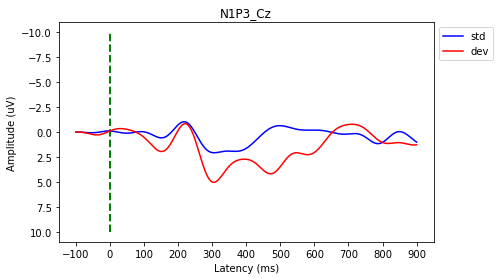

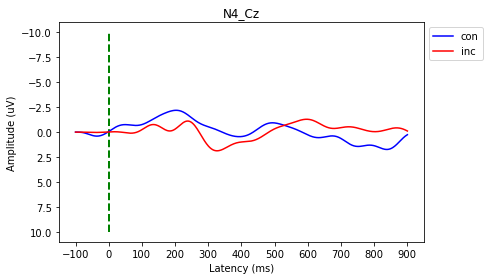

Mild-Moderate Dementia @ Baseline


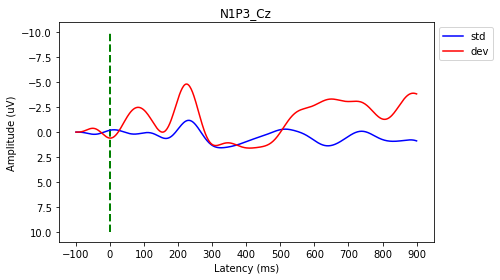

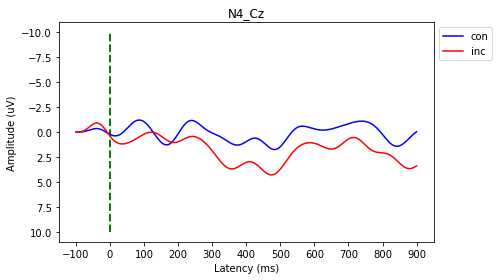

Severe Dementia @ Baseline
Cz : 0014_1_17042019_1029  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0014_1_17042019_1029  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0069_1_25022019_1353  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75


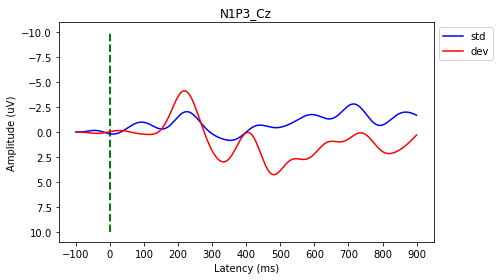

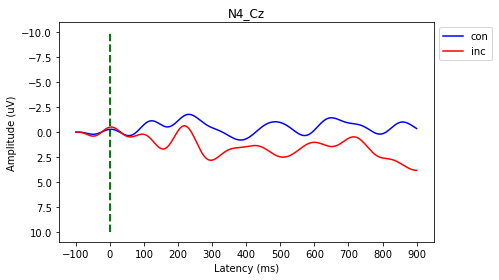

In [11]:
print("ERPs of Cognitive Impairment Classes @ Baseline")
nd_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_nd_baseline,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ Baseline",img_name="No Dementia @ Baseline",destination_dir=image_dest_dir)
mild_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_mild_moderate_baseline,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild-Moderate Dementia @ Baseline",img_name="Mild-Moderate Dementia @ Baseline",destination_dir=image_dest_dir)
severe_baseline = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_severe_baseline,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ Baseline",img_name="Severe Dementia @ Baseline",destination_dir=image_dest_dir)

ERPs of Cognitive Impairment Classes @ 6-months
No Dementia @ 6-months


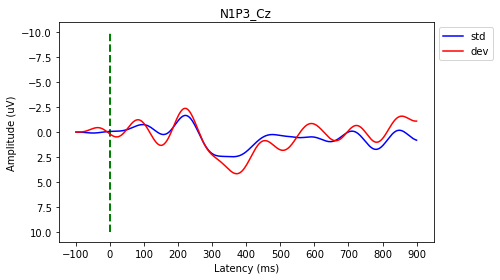

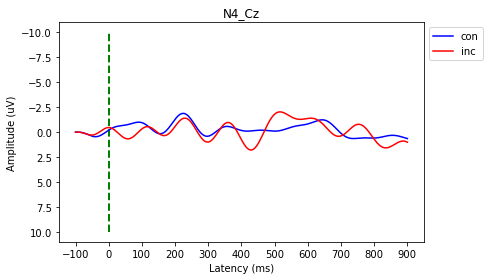

Mild-Moderate Dementia @ 6-months
Cz : 0003_1_20082019_1126  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_20082019_1126  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_20082019_1126  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_20082019_1126  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0024_1_24072019_1139  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0024_1_24072019_1139  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0024_1_24072019_1139  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0024_1_24072019_1139  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0028_1_27082019_1204  removed for deviant tones N1P

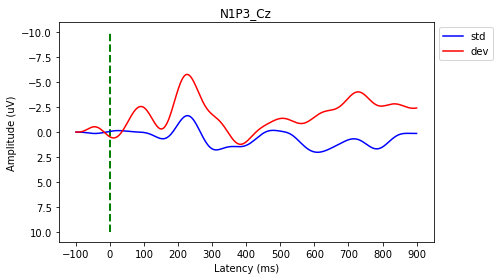

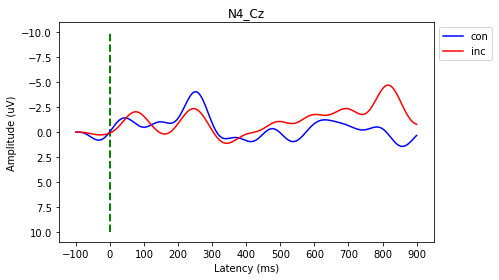

Severe Dementia @ 6-months
Cz : 0406_1_20082019_1100  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0406_1_20082019_1100  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75


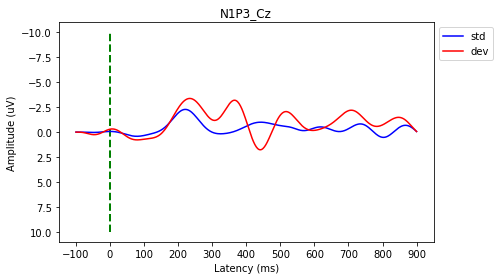

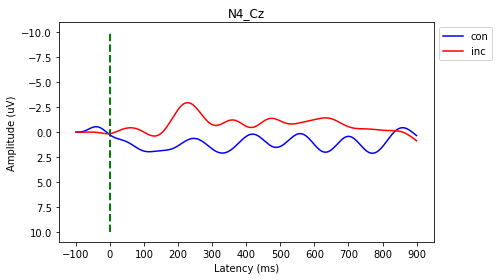

In [12]:
print("ERPs of Cognitive Impairment Classes @ 6-months")
nd_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_nd_6,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ 6-months",img_name="No Dementia @ 6-months",destination_dir=image_dest_dir)
mild_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_mild_moderate_6,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild-Moderate Dementia @ 6-months",img_name="Mild-Moderate Dementia @ 6-months",destination_dir=image_dest_dir)
severe_6 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_severe_6,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ 6-months",img_name="Severe Dementia @ 6-months",destination_dir=image_dest_dir)

ERPs of Cognitive Impairment Classes @ 12-months
No Dementia @ 12-months


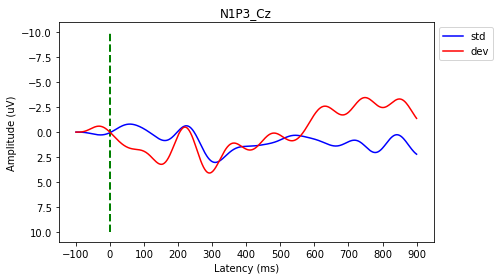

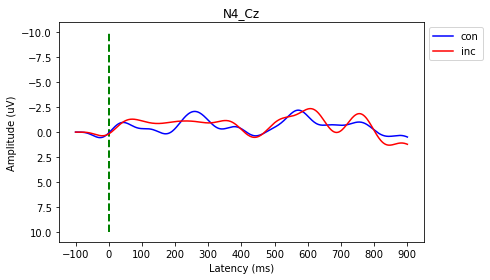

Mild-Moderate Dementia @ 12-months
Cz : 0003_1_13122019_1352  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_13122019_1352  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_13122019_1352  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0003_1_13122019_1352  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0104_1_05122019_1522  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0104_1_05122019_1522  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0104_1_05122019_1522  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0104_1_05122019_1522  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0104_1_05122019_1522  removed for incongruent word

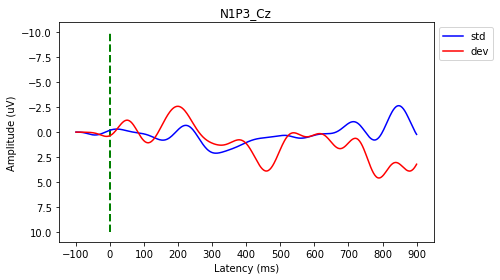

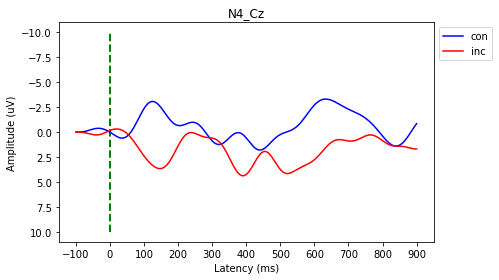

Severe Dementia @ 12-months
Cz : 0110_1_21112019_1051  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0110_1_21112019_1051  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0110_1_21112019_1051  removed for congruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0110_1_21112019_1051  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0135_1_18122019_1138  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0135_1_18122019_1138  removed for incongruent words N4 analysis as all its epochs exceed the clip value of 75
Cz : 0406_1_05122019_1339  removed for standard tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0406_1_05122019_1339  removed for deviant tones N1P3 analysis as all its epochs exceed the clip value of 75
Cz : 0406_1_05122019_1339  removed for congruent words N4 anal

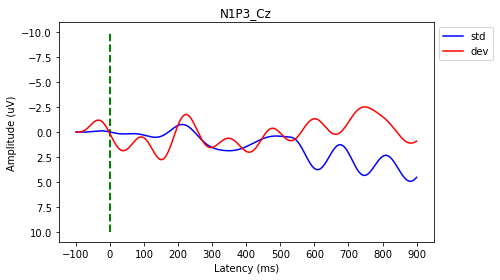

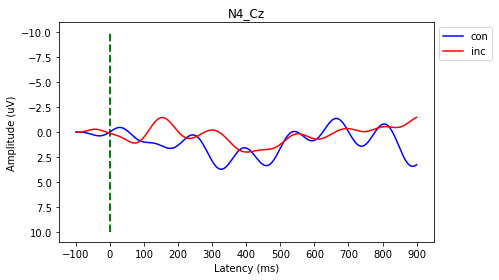

In [13]:
print("ERPs of Cognitive Impairment Classes @ 12-months")
nd_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_nd_12,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="No Dementia @ 12-months",img_name="No Dementia @ 12-months",destination_dir=image_dest_dir)
mild_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_mild_moderate_12,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Mild-Moderate Dementia @ 12-months",img_name="Mild-Moderate Dementia @ 12-months",destination_dir=image_dest_dir)
severe_12 = averageERPs(device_version=version,chanNames=cfg.channelNames,scan_IDs=Q_severe_12,dispIMG_Channel=disp,local_path=localPath,fs=cfg.fs,line=cfg.line,lowcut=cfg.highPass,highcut=cfg.lowPass,stimTrig=cfg.stimTrig,clip=cfg.clip,lowPassERP=cutoff_LP,label="Severe Dementia @ 12-months",img_name="Severe Dementia @ 12-months",destination_dir=image_dest_dir)